# ***Assignment 4: Taking the Pulse of Global Groundwater***

This assignment was developed by Sasha Richey McLarty (sasha.richey@wsu.ed), Washington State University & Michael Morphew (mmorphew@stanford.edu), Stanford Environmental Geophysics Group

This assignment is due on 2025-10-23. Please put your answers within this notebook and share the completed notebook with the TAs rishudh@stanford.edu & jmells@stanford.edu using the "Share" banner located at the top right corner of this notebook. When sharing your notebook, please change the name of the notebook and add your name and sunetid (e.g., tpp_assignment_4_firstname_lastname_sunetid.ipynb) For help submitting, see the canvas walkthrough. If you are still having technical difficulties, email us before the deadline.


###**INTRODUCTION TO THE ASSIGNMENT**
This week we will observe changes in the volume of stored groundwater at a global level. We will work with GRACE data while also leveraging additional datasets and model outputs. Students will select an area of interest and consider the strengths and limitations of remotely sensed observations at large spatial scales.

###**DATA SETS**
The Gravity Recovery and Climate Experiment (GRACE) satellite mission acquired data between 2003 and 2017. It was a joint mission between the German Space Agency and the U.S. National Aeronautics and Space Agency (NASA). Originally launched to better understand Earth’s gravity field, GRACE has since been used to study a myriad of Earth system variables including oceanic currents, sea level rise, and, as you will study in this assignment, groundwater. GRACE is a relative gravimeter; therefore it can only observe relative changes in gravity between two time periods or locations and does not observe the total magnitude of the gravity field.

Gravity anomalies are converted into water mass anomalies to study the hydrologic cycle. GRACE applications to the hydrologic cycle are based on the simple water budget (covered in class), which represents changes in total water storage as the sum of changes in the component parts of the water budget. GRACE provides an integrated measure of the total vertical water column over large areas, but the GRACE observations cannot directly differentiate between mass changes in any particular variable.

The GRACE-based water budget represents anomalies in total (terrestrial) water storage, S, as the sum of anomalies in various components (Equation 1). To determine the groundwater anomaly, we need to solve for $∆GW$ in this equation.


### Equation 1
$∆S=∆SW+∆SWE+∆SM+∆C+∆GW$

$∆$ = anomaly in a variable

$∆S$ = total water storage anomaly [L] - mass change that is causing a gravity change

$∆SW$ = surface water anomaly  [L]

$∆SWE$ = snow water equivalent anomaly  [L]

$∆SM$= soil moisture anomaly  [L]

$∆C$= canopy anomaly  [L]

$∆GW$ = groundwater anomaly


Data sets used in this assignment are: 1) total water storage anomalies (TWSA) derived from GRACE data; 2) model outputs from the Global Land Data Assimilation System (GLDAS- a NASA modeling framework) to get the anomalies in snow water equivalent (∆SWE), soil moisture (∆SM), and canopy water (∆C); 3) population density obtained from the Gridded Population of World Version 4 (GPWv4); 4) irrigation density  obtained from the Global Food Security Support Analysis Data (GFSAD) Crop Mask 2010 dataset.


In this assignment we do not have a way of getting information about anomalies in the water stored as surface water - ∆SW

###**Resolution**

All datasets have a spatial resolution of 1 degree latitude by 1 degree longitude (~100 km x 100 km). All datasets exception irrigation and population density have monthly sampling from 2003-2016. Irrigation and population density are "snapshots" from 2010.

###**Units**

**NOTE** - You will need to combine the model outputs with total change in water storage so pay attention to units.

Total Water Storage Anomaly: $[cm]$ (of water)

Model outputs of SWE, soil moisture, and canopy water: $[mm]$

Population density: estimated number of persons per square kilometer

Irrigation density: a number corresponding to land use type: 0 = non-cropland, 1 = major irrigation, 2 = minor irrigation, 3-8 = rainfed

We will also reference our temperature and precipitation dataset analysis from Assignment 3.



###**TOOLBOX**

All the Python functions and packages you will use in this assignment are in the toolbox for the course. We add new tools to the toolbox with each assignment as new ways of analyzing and visualizing data are introduced.

https://colab.research.google.com/drive/1YbZfugy0PdglDcws4bqJFhkmDtlF-h8W?usp=sharing

We will use the libraries numpy, pandas, matplotlib, xarray, cartopy, datetime to analyze this data (more information about these in the above linked toolbox).

##**THE LEARNING GOALS FOR THE WEEK**

(where the course learning goals are in plain text, and the focus this week is in italics)

● learn about the ways in which climate change and human activity are impacting planet Earth, *with a focus this week groundwater from a global perspective.*

● become familiar with the wide range of (primarily satellite) sensors available to study various components of the Earth system. *This week we will work with data acquired using the GRACE satellite system.*

● become familiar with the basic physical principles (resolution, sampling, processing workflows, etc.) common to all sensors, *working this week with data sets all of which differ in terms of resolution, sampling, and processing workflows.*

● work with various sources of data, learning how to access, analyze, synthesize, and describe the data to quantify trends; think critically and creatively about how to project these trends into the future. *This week we will consider trends in the data that reveal periods of hydrologic extremes, evaluate the dominant drivers of observed data, compare the data in different geographic regions, and determine causal links between various data sets.*

● describe the complex interactions between human activity and various components of the Earth system. This week we begin by looking at global water budget dynamics to consider how humans add an additional layer of change on top of natural processes, both for the total water budget and groundwater. *In this assignment we will consider how the drivers of observed change may impact the future.*

# **In Class Set Up for Assignment**

### 1) **Install and Import Packages**


In [1]:
!pip install xarray numpy pandas geopandas cartopy ipywidgets redivis rioxarray pykrige&> /dev/null
!pip install shapely --no-binary shapely &> /dev/null

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cf
import datetime
import redivis
from ipywidgets import widgets, interact
from shapely.geometry import mapping
from matplotlib.colors import LogNorm
matplotlib.rcParams['font.size'] = 14
import shapely
from pykrige.ok import OrdinaryKriging

### 2) **Download and Review the Data**
Run the following code cell to load the data into a variable called *total_water_storage_data*.

In [3]:
user = redivis.user("sdss")
dataset = user.dataset("geophysics_115_taking_the_pulse_of_the_planet:fg2x:v1_7")
table = dataset.table("taking_the_pulse_global_data:rjah")

# Load table as a dataframe
df_global = table.to_pandas_dataframe(max_results=100)

# This table contains file references, to download:
# table_atmosphere.download_files('./taking_the_pulse_atmosphere_data/',overwrite=True)
table.download_files('./taking-the-pulse-global-data/',overwrite=True)
total_water_storage_data = xr.load_dataset('taking-the-pulse-global-data/twsa.nc')
total_water_storage_data = total_water_storage_data.transpose("time", "y", "x")
total_water_storage_data

Please visit the URL below to authenticate with your Redivis account:
https://redivis.com/oauth/authorize?user_code=fc6ece27f0b644e81d4f33352fb67b31


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ? files/s]

0.00 (?B/s)

<xarray.Dataset> Size: 87MB
Dimensions:  (y: 180, x: 360, time: 168)
Coordinates:
  * y        (y) int64 1kB -90 -89 -88 -87 -86 -85 -84 ... 83 84 85 86 87 88 89
  * x        (x) int64 3kB -180 -179 -178 -177 -176 -175 ... 175 176 177 178 179
  * time     (time) datetime64[ns] 1kB 2003-01-01 2003-02-01 ... 2016-12-01
Data variables:
    TWSA     (time, y, x) float64 87MB nan nan nan nan nan ... nan nan nan nan

## **The Start of Assignment: Data Analysis and Questions to Complete**

#### **1) TEMPORAL VARIATIONS OF GRACE TOTAL WATER STORAGE ANOMALIES**

#### **a) In Class (discuss & work in groups):** How is the total amount of water (quantified as TWSA) on land changing around the world? To answer this produce a globally gridded map of the trend in TWSA for the recent period (2003-2016). What do you notice? (2-3 sentences)


In [4]:
##### Function Code Block ########
##### you should not need to edit this code block ####

#run this code block to generate a function that we can use to take the linear fit
def linear_fit(time_series, data):
    # assume the time series has a regular sampling rate
    times = np.arange(len(time_series))
    G = np.c_[times, np.ones_like(times)]
    Pinv = np.linalg.pinv(G)
    m = Pinv.dot(data)
    predicted_data = G @ m
    slope = m[0,:]
    intercept = m[1,:]
    return predicted_data, slope, intercept

In [5]:
# in this example we are using the data category 'TWSA'
# if you want to look at a different data category make sure to change this before running the code
your_data_grid = total_water_storage_data.TWSA.data.reshape((total_water_storage_data.TWSA.data.shape[0], np.prod(total_water_storage_data.TWSA.data.shape[1:]))) # makes the 2d grid into a column vector where each index of the column is a location on the map
your_time_series = pd.to_datetime(total_water_storage_data.time.data)                                                                            # pulls the time steps


TWSA_linear_fit, slope, intercept = linear_fit(your_time_series, your_data_grid)                                                           #makes linear fits for every location

# Add results back to total_water_storage_data
total_water_storage_data['slope'] = (("y", "x"), slope.reshape(total_water_storage_data.TWSA.data.shape[1:]))                                        # makes a new 'slope' dataset in the dataframe
total_water_storage_data['intercept'] = (("y", "x"), intercept.reshape(total_water_storage_data.TWSA.data.shape[1:]))                                # makes a new 'intercept' dataset in the dataframe
total_water_storage_data['TWSA_linear_fit'] = (("time", "y", "x"), TWSA_linear_fit.reshape(total_water_storage_data.TWSA.data.shape))                  # incorperates the predicted points into the dataframe

# pulls out the date range and reformats it to a useful format for printing
time_min = pd.to_datetime(your_time_series).min().strftime('%Y-%m')
time_max = pd.to_datetime(your_time_series).max().strftime('%Y-%m')

In [6]:
# Calculate percentiles to adjust color range
your_min_number = np.nanpercentile(total_water_storage_data.slope.values,0.75)
your_max_number = np.nanpercentile(total_water_storage_data.slope.values,100)

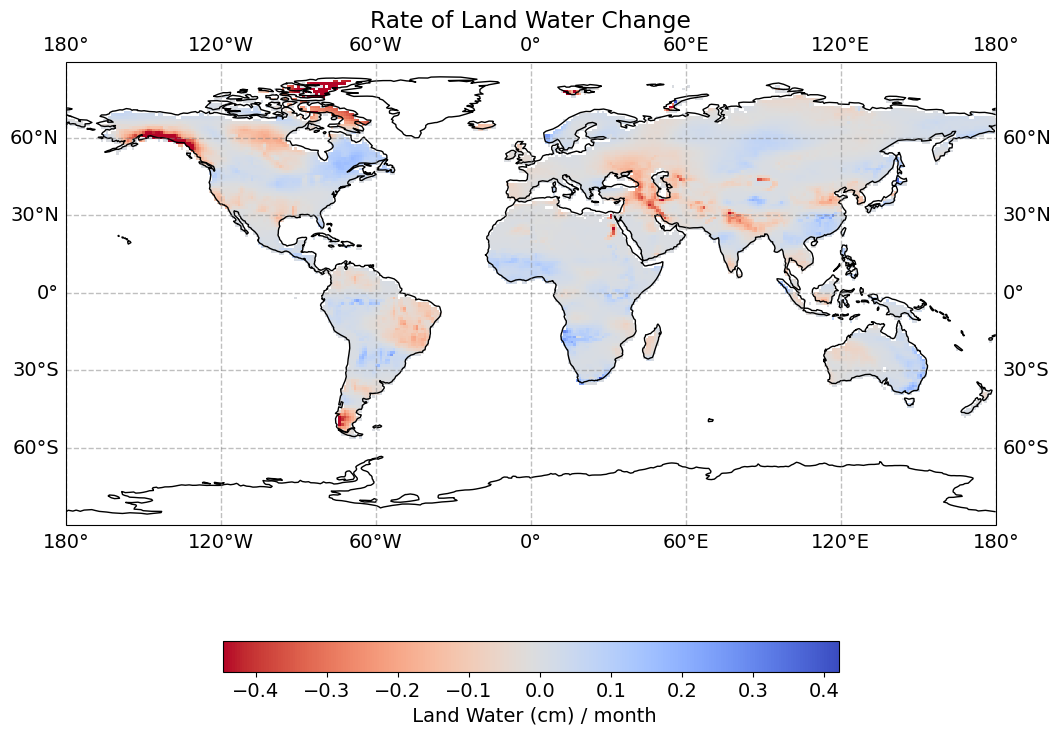

In [7]:
fig = plt.figure(figsize=(12, 10))                                              #establishes a figure and sets the size
ax = plt.axes(projection=ccrs.PlateCarree())                                    #sets up axes & turns the lon-lat into a flat map
ax.axes.add_feature(cf.COASTLINE)                                               #adds boundaries for the coastlines

## we learned this in the section above!-- added ax=ax and removed color bar so we can make a custom one (see below)
your_output = total_water_storage_data.slope.plot(cmap = 'coolwarm_r', ax=ax, add_colorbar = False, vmin=your_min_number, vmax=your_max_number)

cb = plt.colorbar(your_output, fraction=0.04, orientation='horizontal')         #make a custom color bar that looks better than the default
cb.set_label(" Land Water (cm) / month")                                             #label the color bar including units
ax.set_aspect(1)                                                                #ensure that the axes are not out of proportion to one another
ax.set_title("Rate of Land Water Change")

#put in faint grid lines for reference
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=1,
    color='gray',
    alpha=0.5,
    linestyle='--'
)

# need to scale by percentile and also add up per year!!

We can see that in some areas around the world, the amount of water on land seems to be slighly increasing, if not stagnant.

However, it is also drastically decreasing in some key areas, including near the northern and southern poles where a lot of the glaciers are melting, which is where the majority of our world's freshwater is stored. There also seems to be decreasing land water in places like India and the Middle East, which are experiencing severe droughts and diminishing access to clean, fresh water, especially with rapid population growth. We can also see the Central Valley in red on the map (along with other major groundwater-irrigated regions in the world), which suggests that there is decreasing land water there.

Ultimately, although a lot of the map is blue (suggesting increasing land water), it is important to point out that the red regions are much more pronounced; in other words, where there is land water loss, it is significant and likely an issue.


#### **b) In Class (discuss & work in groups):** Are the changes in precipitation driving the changes in TWSA around the globe? In 3-5 sentences summarize the observations of your group.(3-5 sentences)

In [8]:
user = redivis.user("sdss")
dataset = user.dataset("geophysics_115_taking_the_pulse_of_the_planet:fg2x:v1_3")

table_atmosphere = dataset.table("atmosphere_data:9be7")
table_global = dataset.table("global_water_temp_pop_data:cqdz")

# Load table as a dataframe
df_atmosphere = table_atmosphere.to_pandas_dataframe(max_results=100)
df_global = table_global.to_pandas_dataframe(max_results=100)

# This table contains file references, to download:
table_atmosphere.download_files('./taking_the_pulse_atmosphere_data/',overwrite=True)
table_global.download_files('./taking_the_pulse_global_data/',overwrite=True)

gdf_boundaries = gpd.read_file("./taking_the_pulse_atmosphere_data/world-administrative-boundaries.geojson")
temp_precip_data = xr.load_dataset("./taking_the_pulse_global_data/global_temp_and_precip.nc")

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ? files/s]

0.00 (?B/s)

  0%|          | 0/12 [00:00<?, ? files/s]

0.00 (?B/s)

In [9]:
global_precip_total = temp_precip_data

In [10]:
# in this example we are using the data category 'total_precipitation'
# if you want to look at a different data category make sure to change this before running the code
your_data_grid = global_precip_total.total_precipitation.data.reshape((global_precip_total.total_precipitation.data.shape[0], np.prod(global_precip_total.total_precipitation.data.shape[1:]))) # makes the 2d grid into a column vector where each index of the column is a location on the map
your_time_series = pd.to_datetime(global_precip_total.time.data)                                                                            # pulls the time steps


total_precipitation_linear_fit, slope, intercept = linear_fit(your_time_series, your_data_grid)                                                           #makes linear fits for every location

# Add results back to global_precip_total
global_precip_total['slope'] = (("y", "x"), slope.reshape(global_precip_total.total_precipitation.data.shape[1:]))                                        # makes a new 'slope' dataset in the dataframe
global_precip_total['intercept'] = (("y", "x"), intercept.reshape(global_precip_total.total_precipitation.data.shape[1:]))                                # makes a new 'intercept' dataset in the dataframe
global_precip_total['total_precipitation_linear_fit'] = (("time", "y", "x"), total_precipitation_linear_fit.reshape(global_precip_total.total_precipitation.data.shape))                  # incorperates the predicted points into the dataframe

# pulls out the date range and reformats it to a useful format for printing
time_min = pd.to_datetime(your_time_series).min().strftime('%Y-%m')
time_max = pd.to_datetime(your_time_series).max().strftime('%Y-%m')

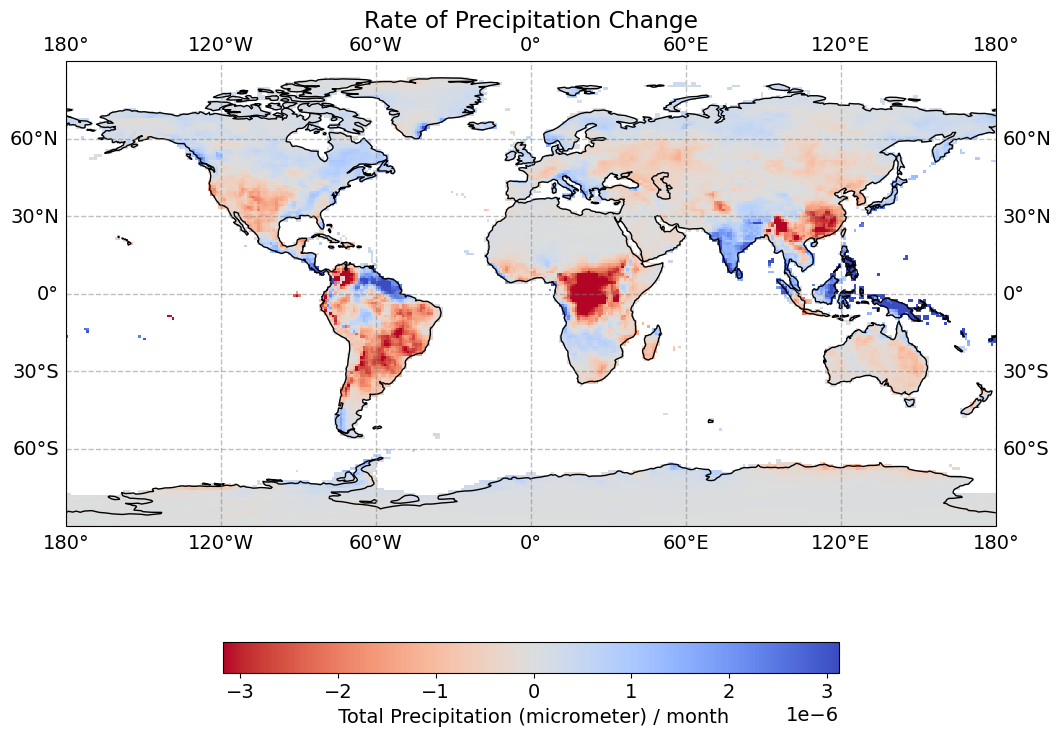

In [11]:
# Calculate percentiles to adjust color range
your_min_number = np.nanpercentile(global_precip_total.slope.values,1)
your_max_number = np.nanpercentile(global_precip_total.slope.values,99)

fig = plt.figure(figsize=(12, 10))                                              #establishes a figure and sets the size
ax = plt.axes(projection=ccrs.PlateCarree())                                    #sets up axes & turns the lon-lat into a flat map
ax.axes.add_feature(cf.COASTLINE)                                               #adds boundaries for the coastlines

## we learned this in the section above!-- added ax=ax and removed color bar so we can make a custom one (see below)
your_output = global_precip_total.slope.plot(cmap = 'coolwarm_r', ax=ax, add_colorbar = False, vmin=your_min_number, vmax=your_max_number)

#ax.axes.add_feature(cf.COASTLINE

cb = plt.colorbar(your_output, fraction=0.04, orientation='horizontal')         #make a custom color bar that looks better than the default
cb.set_label(" Total Precipitation (micrometer) / month")                                             #label the color bar including units
ax.set_aspect(1)                                                                #ensure that the axes are not out of proportion to one another
ax.set_title("Rate of Precipitation Change")

#put in faint grid lines for reference
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=1,
    color='gray',
    alpha=0.5,
    linestyle='--'
)

Comparing the precipitation change and land water change maps, we can see that there certainly is a correlation. Precipitation is one of the key flux ins for land/freshwater. Thus, we can see that areas that are experiencing more precipitation also typically have increasing land water (e.g., Central America, Northeastern America, parts of Southeast Asia) and vice versa.

However, there certainly isn't a one-to-one mapping. The precipitation map, for example, does not represent the decreasing land water near the north pole or the Middle East. The land water map doesn't highlight the very pronounced decrease in precipitation in Central Africa.

Ultimately, this illustrates how precipitation, while a major driver of land water change, isn't the only factor. Population growth, increased evapotranspiration, land-use practices, and increased pumping of groundwater all contribute to changing TWSA as well.

#### **2) BASIN AVERAGES USING GRACE**

In the next series of questions you will work with one of the major groundwater basins in the world. Start by selecting your basin from the map below. (We suggest that your group chooses one that you all work on, but if you feel ambitious/curious go for more).

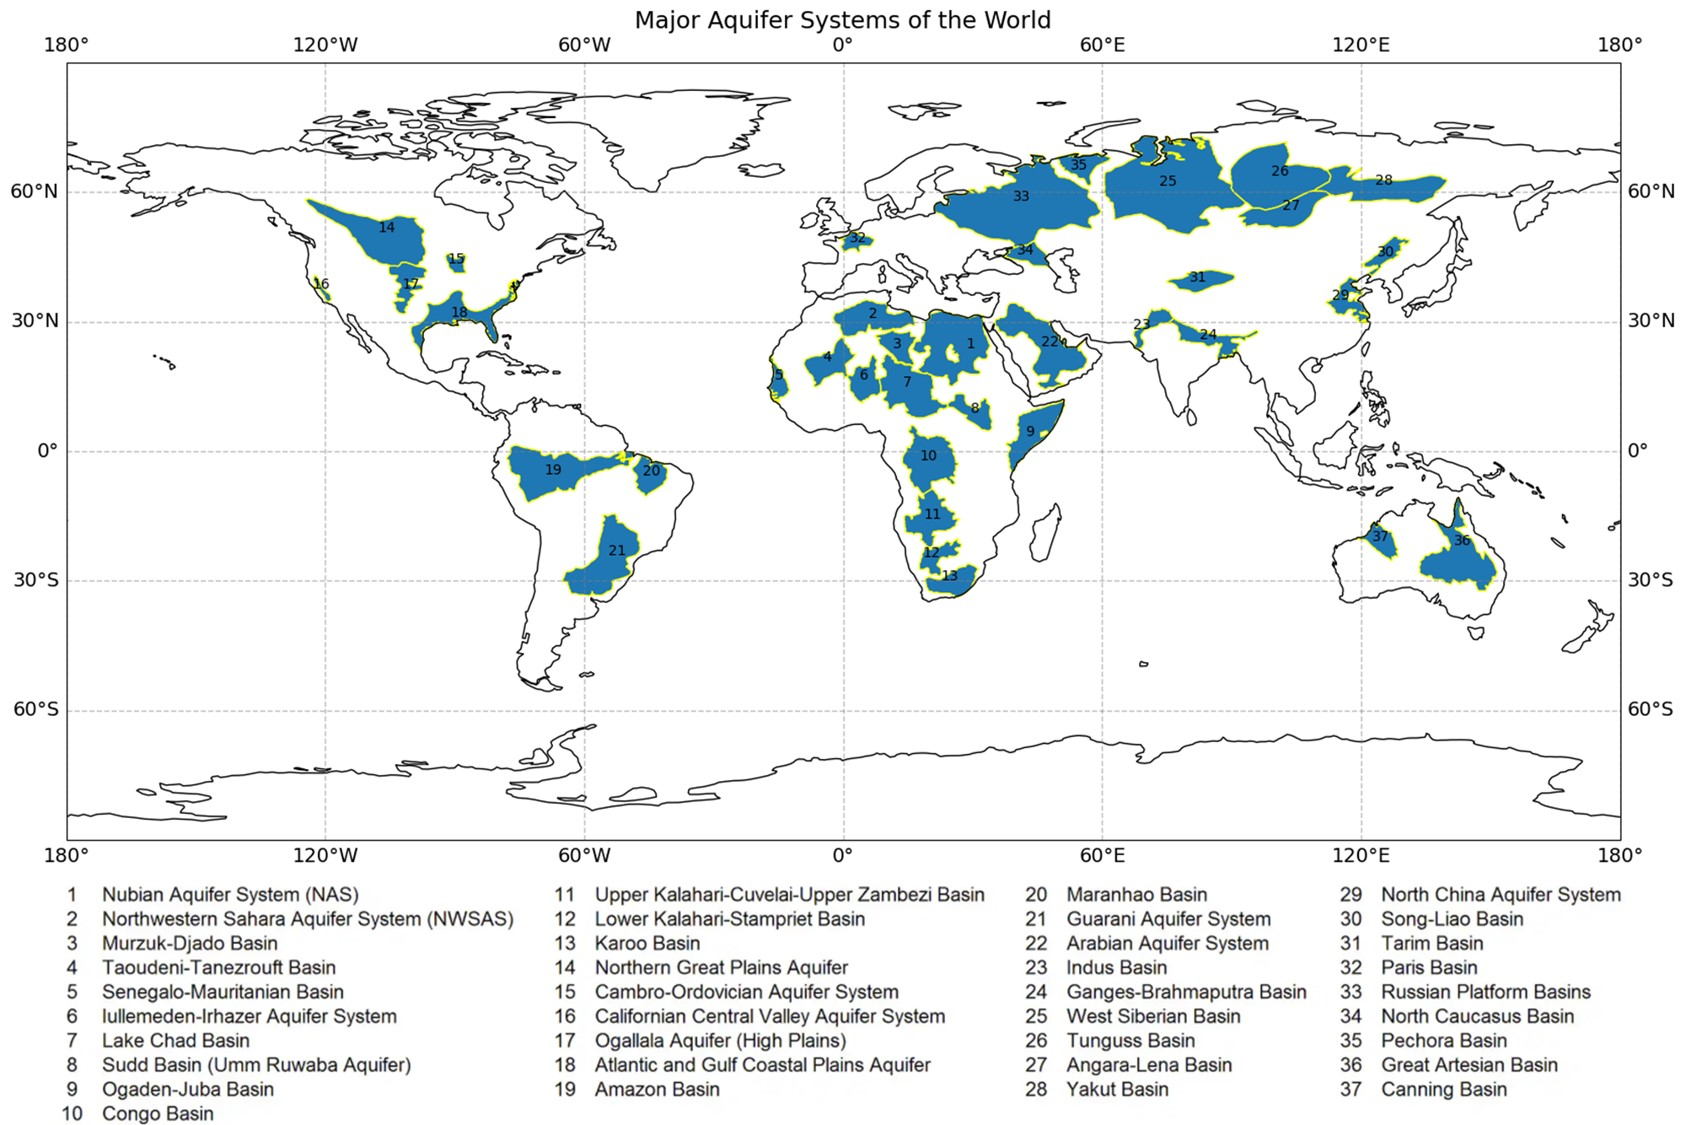

#### **a) In Class (discuss & work in groups):** The code below gives you access to the shape information for these basins so that you can extract basin-wide information. Run the code and then visualize your basin.

In [12]:
# No need to edit! Just run this :)
world_aquifers = gpd.read_file('taking-the-pulse-global-data/world_aquifer_systems_nocoast.shp')

One practical part of data science is updating any missing parts of the data. Here the NaN entries are updated with their proper basin name.

In [13]:
# No need to edit! Just run this :)
world_aquifers['Aquifer_sy']
world_aquifers.at[3,'Aquifer_sy'] = 'Cambro-Ordovician Aquifer System'
world_aquifers.at[35, 'Aquifer_sy'] = 'Northern Great Plains Aquifer'
world_aquifers.at[17, 'Aquifer_sy'] = 'Upper Kalahari-Cuvelai-Upper Zambezi Basin'
world_aquifers.at[18, 'Aquifer_sy'] = 'Lower Kalahri-Stampriest Basin'
world_aquifers.at[14, 'Aquifer_sy'] = 'Sudd Basin (Umm Ruwaba Aquifer)'

In [14]:
# No need to edit! Just run this :)
world_aquifers['coords'] = world_aquifers['geometry'].apply(lambda x: x.representative_point().coords[:])
world_aquifers['coords'] = [coords[0] for coords in world_aquifers['coords']]

The next code cell will print out a list of all the basins. *Note: the numbers don't match up with the numbers in the linked map above, select your basin based off of the name.*

In [15]:
# No need to edit! Just run this :)
world_aquifers['Aquifer_sy']

,Aquifer_sy
0,Guarani Aquifer System (Parana&Choco Parana Ba...
1,Maranhao Basin
2,Atlantic and Gulf Coastal Plain Aquifers
3,Cambro-Ordovician Aquifer System
4,California Cenral Vally Aquifer System
5,Canning Basin
6,Great Artesian Basin
7,Nubian Aqufer System (Nubian Sandstone and Pos...
8,Sahara Septentrional (SASS)
9,Murzuk-Djado Basin


Below, modify the code to include the name of the basin you wish to study in more detail.

In [16]:
# Remember to spell it exactly as it was written -- use copy paste!
my_aquifer_name = 'Indus Basin'
my_aquifer = world_aquifers[world_aquifers['Aquifer_sy']==my_aquifer_name]
my_aquifer

,OBJECTID,AREA,PERIMETER,WROB0_CONT,WROB0_CO_1,HYGEO,Aquifer_sy,Shape_Leng,Shape_Area,geometry,coords
20,3672,1.047059e+14,2.062106e+08,158,0,23,Indus Basin,35.23483,28.68941,"POLYGON ((67.30772 27.39835, 67.34509 27.60501...","(69.28215474480581, 28.288147681000055)"


In [17]:
# No need to edit! Just run this :)
total_water_storage_anomaly_copy = xr.load_dataset('taking-the-pulse-global-data/twsa.nc')

This generates a spatial distribution:

In [18]:
# Hint you might need to use these code cells on a future question, but for now just leave them as is
total_water_storage_anomaly_copy.rio.write_crs(4326, inplace=True)
total_water_storage_anomaly_copy.rio.set_spatial_dims(x_dim="x", y_dim="y", inplace=True)
total_water_storage_anomaly_clipped = total_water_storage_anomaly_copy.rio.clip(my_aquifer.geometry.apply(mapping), my_aquifer.crs, drop=True)

Now to visualize it, in a code cell, plot a slice of the clipped basin we just created.

Text(0.5, 116.2777777777777, 'Longitude')

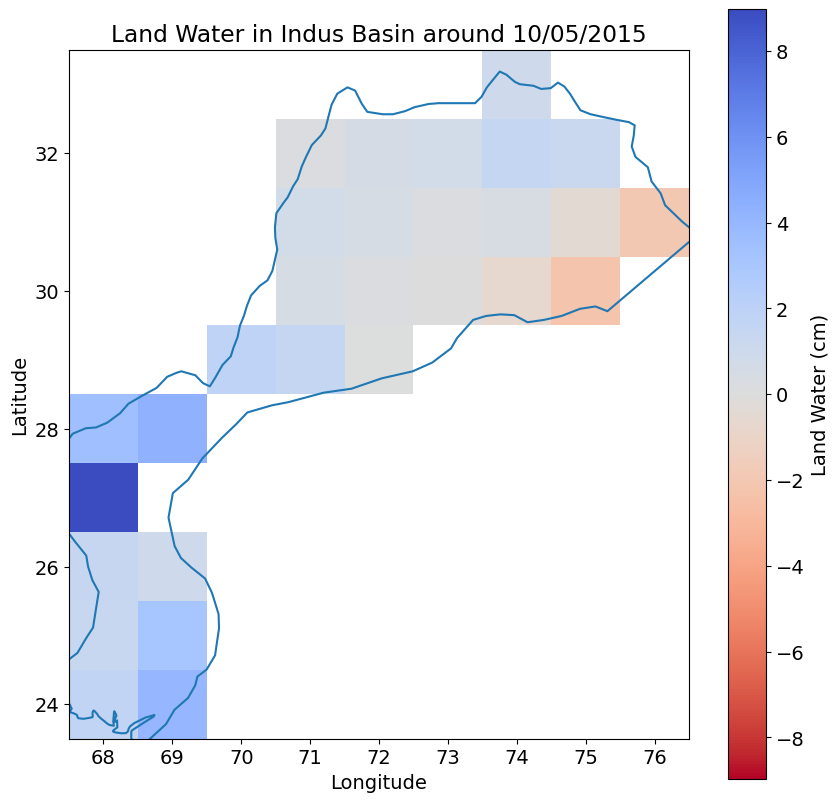

In [19]:
fig,ax = plt.subplots(figsize=(10,10))                                                                        #establishes a figure and sets the size
total_water_storage_anomaly_clipped.TWSA.sel(time='2015-10-05', method='nearest').plot(cbar_kwargs={'label': 'Land Water (cm)'}, cmap = 'coolwarm_r')
my_aquifer.boundary.plot(ax=ax)
ax.set_title('Land Water in Indus Basin around 10/05/2015')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

#### **b) In Class (discuss & work in groups):** In your selected basin, what is the rate of change of the basin-scale average of TWSA over time? Plot and then describe what you see in 3-5 sentences.

In [20]:
total_water_storage_monthly = total_water_storage_anomaly_clipped.resample(time='ME').mean()

In [21]:
# in this example we are using the data category 'TWSA'
# if you want to look at a different data category make sure to change this before running the code
your_data_grid = total_water_storage_monthly.TWSA.data.reshape((total_water_storage_monthly.TWSA.data.shape[0], np.prod(total_water_storage_monthly.TWSA.data.shape[1:]))) # makes the 2d grid into a column vector where each index of the column is a location on the map
your_time_series = pd.to_datetime(total_water_storage_monthly.time.data)                                                                            # pulls the time steps


TWSA_linear_fit, slope, intercept = linear_fit(your_time_series, your_data_grid)                                                           #makes linear fits for every location

# Add results back to total_water_storage_monthly
total_water_storage_monthly['slope'] = (("y", "x"), slope.reshape(total_water_storage_monthly.TWSA.data.shape[1:]))                                        # makes a new 'slope' dataset in the dataframe
total_water_storage_monthly['intercept'] = (("y", "x"), intercept.reshape(total_water_storage_monthly.TWSA.data.shape[1:]))                                # makes a new 'intercept' dataset in the dataframe
total_water_storage_monthly['TWSA_linear_fit'] = (("time", "y", "x"), TWSA_linear_fit.reshape(total_water_storage_monthly.TWSA.data.shape))                  # incorperates the predicted points into the dataframe

# pulls out the date range and reformats it to a useful format for printing
time_min = pd.to_datetime(your_time_series).min().strftime('%Y-%m')
time_max = pd.to_datetime(your_time_series).max().strftime('%Y-%m')

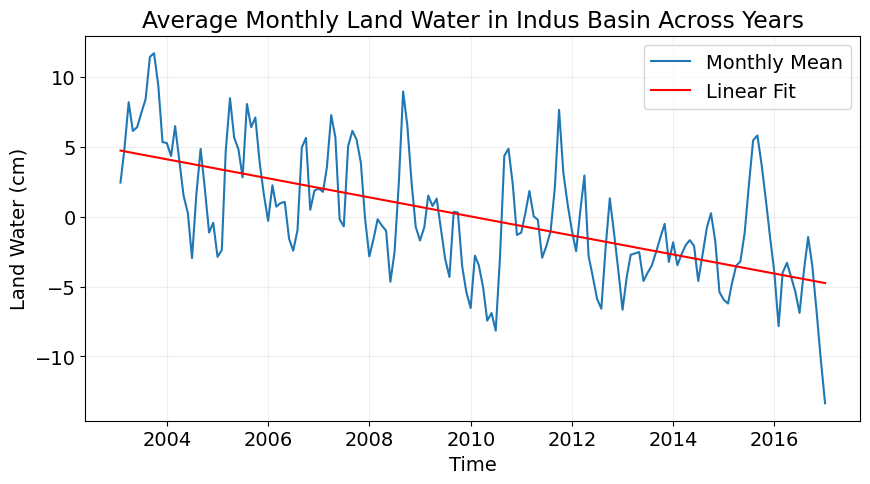

In [22]:
fig,ax = plt.subplots(figsize=(10,5))
total_water_storage_monthly.TWSA.mean(dim = ['x','y']).plot(ax=ax, label = 'Monthly Mean')
total_water_storage_monthly.TWSA_linear_fit.mean(dim = ['x','y']).plot(ax=ax, color='red', label = 'Linear Fit') #plot linear fit
ax.grid(True, alpha=0.2)                        #sets a grid on your plot
ax.set_ylabel("Land Water (cm)")  #sets labels on your y axis
ax.set_xlabel("Time")   #sets labels on your x axis
ax.set_title("Average Monthly Land Water in Indus Basin Across Years")
ax.legend()

There is a clear decrease in the land water within the Indus Basin, represented by the downward sloping linear fit. We can see a bit of monthly/yearly seasonality with different rainier season, but the general trend is that land water is decreasing in the Indus Basin. This is supported by the Land Water Change map in part 1), which had areas near the Indus Basin in red. Finally, the linear fit shows that the land water has been decreasing at a rate of -0.68 cm per year during the timeframe of this data.

#### **3) GRACE-DERIVED MAPS OF GROUNDWATER ANOMALIES**

GRACE is used to estimate $∆S$ in Equation 1. In order to get $∆GW$ which is what we want, we are going to use model outputs for the remaining components.

You’ll be asked to think about how additional datasets could be useful in improving estimates of $∆GW$.





In [23]:
### No need to edit this code block -- simply reading in data
gldas_snow_water_equivalent = xr.load_dataset('taking-the-pulse-global-data/SWE.nc')
gldas_snow_water_equivalent = gldas_snow_water_equivalent.transpose("time", "y", "x")

gldas_canopy_water = xr.load_dataset('taking-the-pulse-global-data/can.nc')
gldas_canopy_water = gldas_canopy_water.transpose("time", "y", "x")

gldas_soil_moisture = xr.load_dataset('taking-the-pulse-global-data/sm.nc')
gldas_soil_moisture = gldas_soil_moisture.transpose("time", "y", "x")

#### **a) In Class (discuss & work in groups):** Calculate anomalies for the new data we have imported (see Toolbox)

In [24]:
#first make a deep copy of our data so that you don't write over the original data
gldas_snow_water_equivalent_anomaly = gldas_snow_water_equivalent.copy(deep=True)

#then we want to calculate the average of our data wrt time
gldas_snow_water_eq_mean = gldas_snow_water_equivalent.sel(time = slice('2004-01-01', '2009-12-31')).mean(['time'])

#in this example we want to perform our measurement over the time index
#therefore we set the range to be over each time variable in our dataset
for i in range(len(gldas_snow_water_equivalent.time)):
  #here we subtract the mean from each datapoint in our dataset
  gldas_snow_water_equivalent_anomaly['SnowWaterEquivalent'][i,:,:] = gldas_snow_water_equivalent_anomaly['SnowWaterEquivalent'][i,:,:] - gldas_snow_water_eq_mean['SnowWaterEquivalent']

In [25]:
#first make a deep copy of our data so that you don't write over the original data
gldas_canopy_water_anomaly = gldas_canopy_water.copy(deep=True)

#then we want to calculate the average of our data wrt time
gldas_canopy_water_anomaly_mean = gldas_canopy_water.sel(time = slice('2004-01-01', '2009-12-31')).mean(['time'])

#in this example we want to perform our measurement over the time index
#therefore we set the range to be over each time variable in our dataset
for i in range(len(gldas_canopy_water.time)):
  #here we subtract the mean from each datapoint in our dataset
  gldas_canopy_water_anomaly['Canopy'][i,:,:] = gldas_canopy_water_anomaly['Canopy'][i,:,:] - gldas_canopy_water_anomaly_mean['Canopy']

In [26]:
#first make a deep copy of our data so that you don't write over the original data
gldas_soil_moisture_anomaly = gldas_soil_moisture.copy(deep=True)

#then we want to calculate the average of our data wrt time
gldas_soil_moisture_anomaly_mean = gldas_soil_moisture.sel(time = slice('2004-01-01', '2009-12-31')).mean(['time'])

#in this example we want to perform our measurement over the time index
#therefore we set the range to be over each time variable in our dataset
for i in range(len(gldas_soil_moisture.time)):
  #here we subtract the mean from each datapoint in our dataset
  gldas_soil_moisture_anomaly['SoilMoisture'][i,:,:] = gldas_soil_moisture_anomaly['SoilMoisture'][i,:,:] - gldas_soil_moisture_anomaly_mean['SoilMoisture']

#### **b) In Class (discuss & work in groups):** Create a map of groundwater anomaly for the whole globe. *Recall that GLDAS model outputs are in mm and $∆S$ from GRACE is in cm.*

In [27]:
groundwater_anomaly = total_water_storage_data.TWSA * 10 - (gldas_snow_water_equivalent_anomaly['SnowWaterEquivalent'] + gldas_canopy_water_anomaly['Canopy'] + gldas_soil_moisture_anomaly['SoilMoisture'])

After you calculate your groundwater anomaly data, use the code cell below to convert it into a gridded dataset so we can properly visualize it.

In [28]:
groundwater_anomaly = groundwater_anomaly.to_dataset(name='groundwater_anomaly')
groundwater_anomaly

<xarray.Dataset> Size: 87MB
Dimensions:              (y: 180, x: 360, time: 168)
Coordinates:
  * y                    (y) int64 1kB -90 -89 -88 -87 -86 ... 85 86 87 88 89
  * x                    (x) int64 3kB -180 -179 -178 -177 ... 176 177 178 179
  * time                 (time) datetime64[ns] 1kB 2003-01-01 ... 2016-12-01
Data variables:
    groundwater_anomaly  (time, y, x) float64 87MB nan nan nan ... nan nan nan

Text(0, 0.5, 'Latitude')

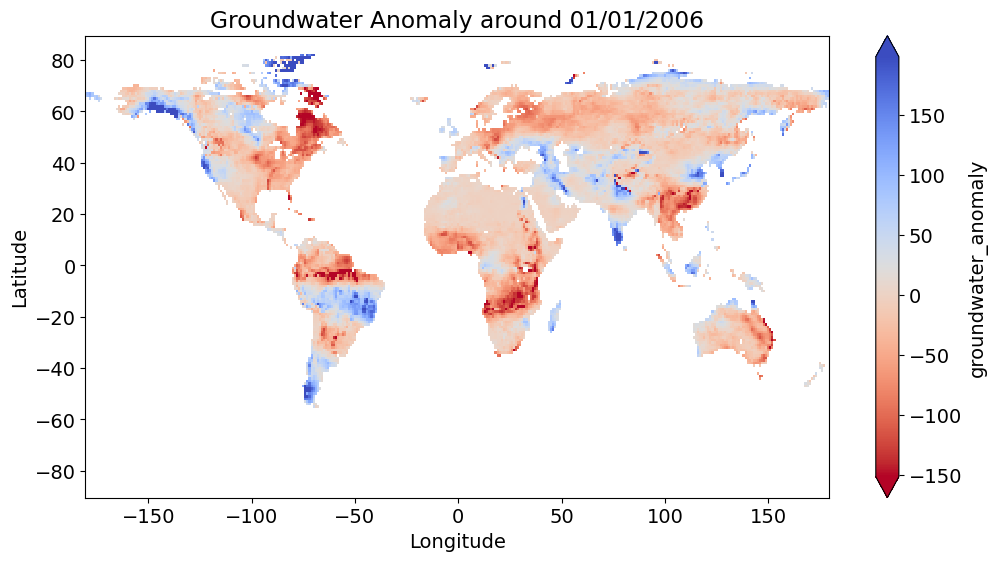

In [58]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))    #sets the size of your figure and the number of subplots (in this case there is just 1 plot)

# Calculate percentiles to adjust color range
groundwater_data_slice = groundwater_anomaly['groundwater_anomaly'].sel(time='2006-01-01', method='nearest').values
your_min_number = np.nanpercentile(groundwater_data_slice, 1)
your_max_number = np.nanpercentile(groundwater_data_slice, 99)


groundwater_anomaly['groundwater_anomaly'].sel(time='2006-01-01', method='nearest').plot(ax=ax, cmap='coolwarm_r', vmin=your_min_number, vmax=your_max_number)
ax.set_title('Groundwater Anomaly around 01/01/2006')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

#### **c) Outside of Class:** Now that we've calculated groundwater anomaly for the whole world, let's zoom in on your selected region. First, document if there are large surface water features in your study area (such as lakes, reservoirs, or glaciers) that are not accounted for in the data we're using and comment on how these features will impact your results. (2-5 sentences)

The Indus Basin has many large surface water features, including reservoirs like Tarbela and Mangla, irrigation canals that stem from the main rivers and tributaries of the basin (Shyok, Gilgit, Kabul, Kurram, and Gomal), and glacial systems in the Himalayas, Karakoram, and Hindu Kush ranges.

Since we are calculating groundwater by subtracting TWSA (from GRACE data) by canopy, soil, and ice water (from model outputs), having a lot of surface water would mean subtracting a lot from the TWSA, which could mean lower calculations for groundwater.

In general, the large amount of surface water in the Indus Basin, and fluctuations to it, could be misinterpreted as groundwater changes, potentially under/overestimating true groundwater depletion in the Indus Basin.

#### **d) In Class (discuss & work in groups):**  Produce a basin-averaged time series/trendline of $∆GW$ for your focus region. Compare and contrast the time series for $∆GW$  and $∆S$. (2-3 sentences)

Clip for the boundary now of our basin
Plot each variable separetly now within my basin

In [30]:
groundwater_anomaly.rio.write_crs(4326, inplace=True)
groundwater_anomaly.rio.set_spatial_dims(x_dim="x", y_dim="y", inplace=True)
groundwater_anomaly_clipped = groundwater_anomaly.rio.clip(my_aquifer.geometry.apply(mapping), my_aquifer.crs, drop=True)

In [31]:
groundwater_anomaly_monthly = groundwater_anomaly_clipped.resample(time='ME').mean()

In [32]:
# in this example we are using the data category 'groundwater_anomaly'
# if you want to look at a different data category make sure to change this before running the code
your_data_grid = groundwater_anomaly_monthly.groundwater_anomaly.data.reshape((groundwater_anomaly_monthly.groundwater_anomaly.data.shape[0], np.prod(groundwater_anomaly_monthly.groundwater_anomaly.data.shape[1:]))) # makes the 2d grid into a column vector where each index of the column is a location on the map
your_time_series = pd.to_datetime(groundwater_anomaly_monthly.time.data)                                                                            # pulls the time steps


groundwater_anomaly_linear_fit, slope, intercept = linear_fit(your_time_series, your_data_grid)                                                           #makes linear fits for every location

# Add results back to groundwater_anomaly_monthly
groundwater_anomaly_monthly['slope'] = (("y", "x"), slope.reshape(groundwater_anomaly_monthly.groundwater_anomaly.data.shape[1:]))                                        # makes a new 'slope' dataset in the dataframe
groundwater_anomaly_monthly['intercept'] = (("y", "x"), intercept.reshape(groundwater_anomaly_monthly.groundwater_anomaly.data.shape[1:]))                                # makes a new 'intercept' dataset in the dataframe
groundwater_anomaly_monthly['groundwater_anomaly_linear_fit'] = (("time", "y", "x"), groundwater_anomaly_linear_fit.reshape(groundwater_anomaly_monthly.groundwater_anomaly.data.shape))                  # incorperates the predicted points into the dataframe

# pulls out the date range and reformats it to a useful format for printing
time_min = pd.to_datetime(your_time_series).min().strftime('%Y-%m')
time_max = pd.to_datetime(your_time_series).max().strftime('%Y-%m')

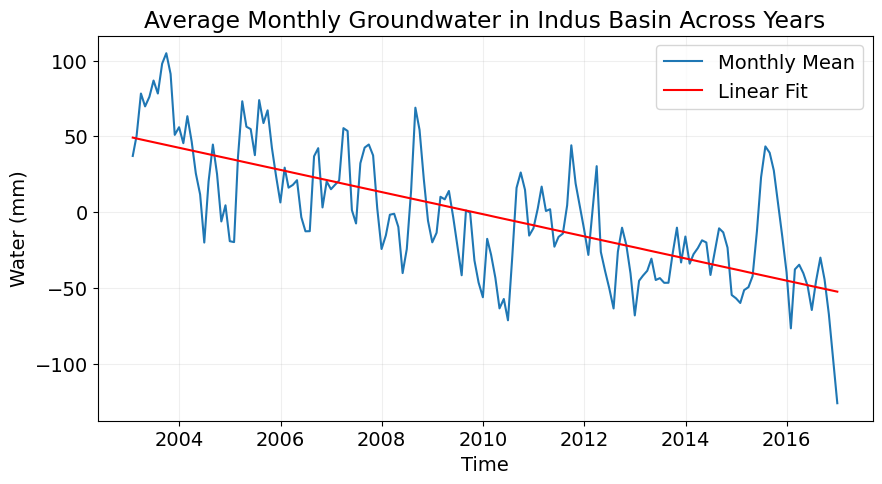

In [33]:
fig,ax = plt.subplots(figsize=(10,5))
groundwater_anomaly_monthly.groundwater_anomaly.mean(dim = ['x','y']).plot(ax=ax, label = 'Monthly Mean')
groundwater_anomaly_monthly.groundwater_anomaly_linear_fit.mean(dim = ['x','y']).plot(ax=ax, color='red', label = 'Linear Fit') #plot linear fit
ax.grid(True, alpha=0.2)                        #sets a grid on your plot
ax.set_ylabel("Water (mm)")  #sets labels on your y axis
ax.set_xlabel("Time")   #sets labels on your x axis
ax.set_title("Average Monthly Groundwater in Indus Basin Across Years")
ax.legend()

The trends are very similar: TWSA and groundwater both seem to be decreasing in the Indus Valley (although the scales are different since I am measuring groundwater in mm here). Groundwater seems to be decreasing by about -0.731 cm per year in the Indus Valley, which is actually more than the change in ΔS.

This suggests, just based off these two graphs alone, that groundwater depletion is the major cause of total terrestrial water depletion in the Indus Valley, but in order to confirm that I must examine the other variables (namely, how canopy, soil, and ice water are changing).

#### **e) In Class (discuss & work in groups):** Also plot the other individual components for your region (soil moisture $∆SM$, snow water equivalent $∆SWE$, canopy water $∆C$). For your basin,  which of the water budget components on the right hand side of Equation 1 is dominating the total GRACE signal? (1-3 sentences)

In [34]:
gldas_snow_water_equivalent_anomaly.rio.write_crs(4326, inplace=True)
gldas_snow_water_equivalent_anomaly.rio.set_spatial_dims(x_dim="x", y_dim="y", inplace=True)
gldas_snow_water_equivalent_anomaly_clipped = gldas_snow_water_equivalent_anomaly.rio.clip(my_aquifer.geometry.apply(mapping), my_aquifer.crs, drop=True)

gldas_canopy_water_anomaly.rio.write_crs(4326, inplace=True)
gldas_canopy_water_anomaly.rio.set_spatial_dims(x_dim="x", y_dim="y", inplace=True)
gldas_canopy_water_anomaly_clipped = gldas_canopy_water_anomaly.rio.clip(my_aquifer.geometry.apply(mapping), my_aquifer.crs, drop=True)

gldas_soil_moisture_anomaly.rio.write_crs(4326, inplace=True)
gldas_soil_moisture_anomaly.rio.set_spatial_dims(x_dim="x", y_dim="y", inplace=True)
gldas_soil_moisture_anomaly_clipped = gldas_soil_moisture_anomaly.rio.clip(my_aquifer.geometry.apply(mapping), my_aquifer.crs, drop=True)

In [35]:
gldas_snow_water_monthly = gldas_snow_water_equivalent_anomaly_clipped.resample(time='ME').mean()
gldas_canopy_water_monthly = gldas_canopy_water_anomaly_clipped.resample(time='ME').mean()
gldas_soil_moisture_monthly = gldas_soil_moisture_anomaly_clipped.resample(time='ME').mean()

In [36]:
# in this example we are using the data category 'SnowWaterEquivalent'
# if you want to look at a different data category make sure to change this before running the code
your_data_grid = gldas_snow_water_monthly.SnowWaterEquivalent.data.reshape((gldas_snow_water_monthly.SnowWaterEquivalent.data.shape[0], np.prod(gldas_snow_water_monthly.SnowWaterEquivalent.data.shape[1:]))) # makes the 2d grid into a column vector where each index of the column is a location on the map
your_time_series = pd.to_datetime(gldas_snow_water_monthly.time.data)                                                                            # pulls the time steps


SnowWaterEquivalent_linear_fit, slope, intercept = linear_fit(your_time_series, your_data_grid)                                                           #makes linear fits for every location

# Add results back to gldas_snow_water_monthly
gldas_snow_water_monthly['slope'] = (("y", "x"), slope.reshape(gldas_snow_water_monthly.SnowWaterEquivalent.data.shape[1:]))                                        # makes a new 'slope' dataset in the dataframe
gldas_snow_water_monthly['intercept'] = (("y", "x"), intercept.reshape(gldas_snow_water_monthly.SnowWaterEquivalent.data.shape[1:]))                                # makes a new 'intercept' dataset in the dataframe
gldas_snow_water_monthly['SnowWaterEquivalent_linear_fit'] = (("time", "y", "x"), SnowWaterEquivalent_linear_fit.reshape(gldas_snow_water_monthly.SnowWaterEquivalent.data.shape))                  # incorperates the predicted points into the dataframe

# pulls out the date range and reformats it to a useful format for printing
time_min = pd.to_datetime(your_time_series).min().strftime('%Y-%m')
time_max = pd.to_datetime(your_time_series).max().strftime('%Y-%m')

In [37]:
# in this example we are using the data category 'Canopy'
# if you want to look at a different data category make sure to change this before running the code
your_data_grid = gldas_canopy_water_monthly.Canopy.data.reshape((gldas_canopy_water_monthly.Canopy.data.shape[0], np.prod(gldas_canopy_water_monthly.Canopy.data.shape[1:]))) # makes the 2d grid into a column vector where each index of the column is a location on the map
your_time_series = pd.to_datetime(gldas_canopy_water_monthly.time.data)                                                                            # pulls the time steps


Canopy_linear_fit, slope, intercept = linear_fit(your_time_series, your_data_grid)                                                           #makes linear fits for every location

# Add results back to gldas_canopy_water_monthly
gldas_canopy_water_monthly['slope'] = (("y", "x"), slope.reshape(gldas_canopy_water_monthly.Canopy.data.shape[1:]))                                        # makes a new 'slope' dataset in the dataframe
gldas_canopy_water_monthly['intercept'] = (("y", "x"), intercept.reshape(gldas_canopy_water_monthly.Canopy.data.shape[1:]))                                # makes a new 'intercept' dataset in the dataframe
gldas_canopy_water_monthly['Canopy_linear_fit'] = (("time", "y", "x"), Canopy_linear_fit.reshape(gldas_canopy_water_monthly.Canopy.data.shape))                  # incorperates the predicted points into the dataframe

# pulls out the date range and reformats it to a useful format for printing
time_min = pd.to_datetime(your_time_series).min().strftime('%Y-%m')
time_max = pd.to_datetime(your_time_series).max().strftime('%Y-%m')

In [38]:
# in this example we are using the data category 'SoilMoisture'
# if you want to look at a different data category make sure to change this before running the code
your_data_grid = gldas_soil_moisture_monthly.SoilMoisture.data.reshape((gldas_soil_moisture_monthly.SoilMoisture.data.shape[0], np.prod(gldas_soil_moisture_monthly.SoilMoisture.data.shape[1:]))) # makes the 2d grid into a column vector where each index of the column is a location on the map
your_time_series = pd.to_datetime(gldas_soil_moisture_monthly.time.data)                                                                            # pulls the time steps


SoilMoisture_linear_fit, slope, intercept = linear_fit(your_time_series, your_data_grid)                                                           #makes linear fits for every location

# Add results back to gldas_soil_moisture_monthly
gldas_soil_moisture_monthly['slope'] = (("y", "x"), slope.reshape(gldas_soil_moisture_monthly.SoilMoisture.data.shape[1:]))                                        # makes a new 'slope' dataset in the dataframe
gldas_soil_moisture_monthly['intercept'] = (("y", "x"), intercept.reshape(gldas_soil_moisture_monthly.SoilMoisture.data.shape[1:]))                                # makes a new 'intercept' dataset in the dataframe
gldas_soil_moisture_monthly['SoilMoisture_linear_fit'] = (("time", "y", "x"), SoilMoisture_linear_fit.reshape(gldas_soil_moisture_monthly.SoilMoisture.data.shape))                  # incorperates the predicted points into the dataframe

# pulls out the date range and reformats it to a useful format for printing
time_min = pd.to_datetime(your_time_series).min().strftime('%Y-%m')
time_max = pd.to_datetime(your_time_series).max().strftime('%Y-%m')

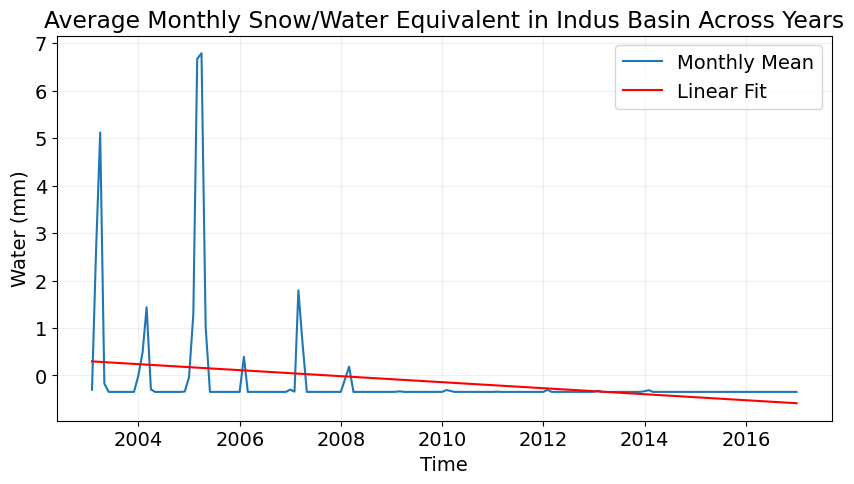

In [59]:
fig,ax = plt.subplots(figsize=(10,5))
gldas_snow_water_monthly.SnowWaterEquivalent.mean(dim = ['x','y']).plot(ax=ax, label = 'Monthly Mean')
gldas_snow_water_monthly.SnowWaterEquivalent_linear_fit.mean(dim = ['x','y']).plot(ax=ax, color='red', label = 'Linear Fit') #plot linear fit
ax.grid(True, alpha=0.2)                        #sets a grid on your plot
ax.set_ylabel("Water (mm)")  #sets labels on your y axis
ax.set_xlabel("Time")   #sets labels on your x axis
ax.set_title("Average Monthly Snow/Water Equivalent in Indus Basin Across Years")
ax.legend()

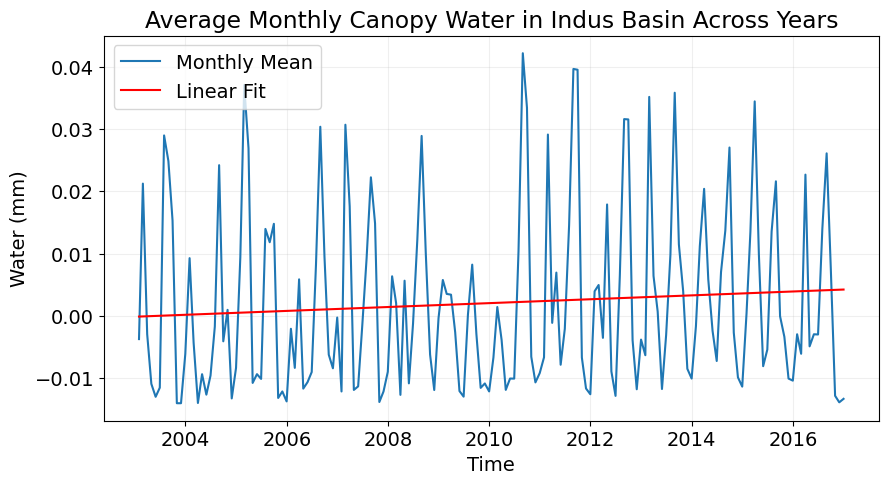

In [40]:
fig,ax = plt.subplots(figsize=(10,5))
gldas_canopy_water_monthly.Canopy.mean(dim = ['x','y']).plot(ax=ax, label = 'Monthly Mean')
gldas_canopy_water_monthly.Canopy_linear_fit.mean(dim = ['x','y']).plot(ax=ax, color='red', label = 'Linear Fit') #plot linear fit
ax.grid(True, alpha=0.2)                        #sets a grid on your plot
ax.set_ylabel("Water (mm)")  #sets labels on your y axis
ax.set_xlabel("Time")   #sets labels on your x axis
ax.set_title("Average Monthly Canopy Water in Indus Basin Across Years")
ax.legend()

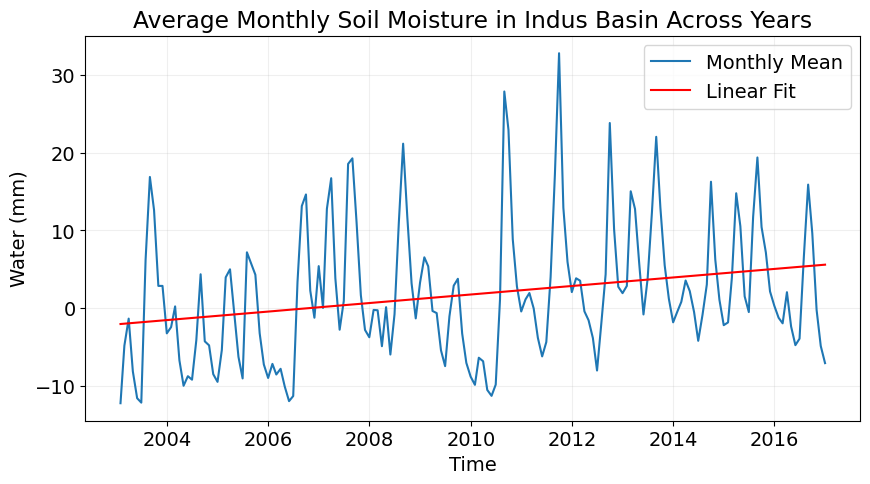

In [41]:
fig,ax = plt.subplots(figsize=(10,5))
gldas_soil_moisture_monthly.SoilMoisture.mean(dim = ['x','y']).plot(ax=ax, label = 'Monthly Mean')
gldas_soil_moisture_monthly.SoilMoisture_linear_fit.mean(dim = ['x','y']).plot(ax=ax, color='red', label = 'Linear Fit') #plot linear fit
ax.grid(True, alpha=0.2)                        #sets a grid on your plot
ax.set_ylabel("Water (mm)")  #sets labels on your y axis
ax.set_xlabel("Time")   #sets labels on your x axis
ax.set_title("Average Monthly Soil Moisture in Indus Basin Across Years")
ax.legend()

We can see that groundwater is clearly dominating the right hand side of the equation, since it consistently records higher monthly water averages compared to canopy, snow/water, and soil moisture (which is the close second).

In terms of total terrestrial water depletion in the Indus Basin, we can now confirm that it is almost all due to decreasing groundwater since the other variables are stagnant if not increasing.

#### **f) Outside of Class:** Conduct a short search about groundwater in your study area. Describe the large aquifer system you chose: briefly describe the system (3-4 sentences) and comment on how well the GRACE-derived information about anomlies in groundwater storage is likely to represent what is happening in the aquifer in your study area.

The Indus Basin aquifer system is actually one of the largest in the world, spanning an area of about 16.2 hectares. There is a lot of pumping from this acquifer for irrigation, and it contains large zones of brackish water, so freshwater availability, in general, is very variable. Recharge happens through river/canal overflow and monsoon rainfall, but in general the long-term groundwater levels are seen to be decreasing, which is contributing to land subsidence as well.

The GRACE-derived information is able to capture this underlying trend that the Indus Basin's groundwater is depleting, and even is able to capture monthly variability and how the groundwater is being naturally recharged. However, GRACE does not have granular-enough resolution to be able to identify where exactly in the Indus Basin acquifer there is the most subsidence and why. For that, we would need techniques like electroresistivity calculations/measurements that we discussed last class.



#### **4) COMPARING GROUNDWATER WITH POPULATION AND IRRIGATION DENSITY**

#### **a) Outside of Class:** Plot the population density and irrigation extent maps. Based on these maps, and additional information as needed, what do you think is driving the total water storage and groundwater patterns observed in the previous two questions? What implications exist for the future state of groundwater and total water availability based on your attribution of change? (5-7 sentences)

#### Look at the two new maps (population and landcover) and either 1) in your basin discuss what you think is driving the changes in total water storage and groundwater storage or 2)  take a "big picture view" of the entire world and discuss what you think is driving the changes in total water storage and groundwater storage in various parts of the world.

In [42]:
# No need to edit! Just run this :)
# Read in additional population and irrigation information
population_density = xr.load_dataset('taking-the-pulse-global-data/population_density.nc')
population_density=population_density.sel(time='2010-01-01', method='nearest')
irrigation_density = xr.load_dataset('taking-the-pulse-global-data/irrigation_density.nc')
irrigation_density = irrigation_density.isel(time=0)

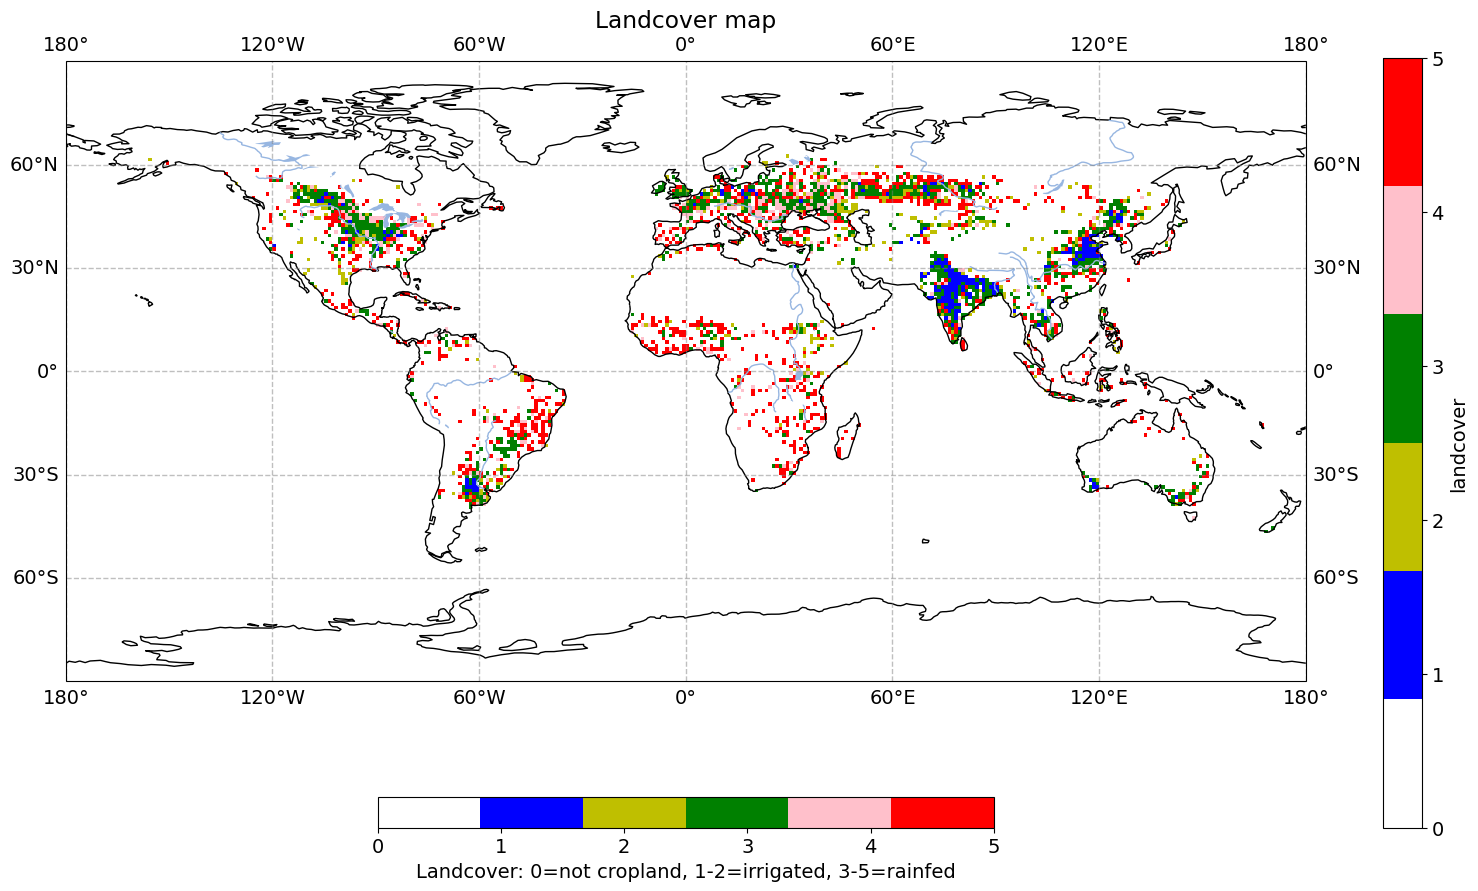

In [43]:
# No need to edit! Just run this :)
discrete_cmap = matplotlib.colors.ListedColormap(['white','b','y','g','pink', 'r'])

fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.axes.add_feature(cf.COASTLINE, color='k')
ax.axes.add_feature(cf.LAKES)
ax.axes.add_feature(cf.RIVERS)

out = irrigation_density['landcover'].plot(ax=ax, cmap=discrete_cmap)
#my_aquifer.boundary.plot(ax=ax, color='red')
cb = plt.colorbar(out, fraction=0.04, orientation='horizontal')
cb.set_label("Landcover: 0=not cropland, 1-2=irrigated, 3-5=rainfed")
ax.set_aspect(1)
ax.set_title("Landcover map")
ax.set_facecolor('lightblue')
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=1,
    color='gray',
    alpha=0.5,
    linestyle='--'
)

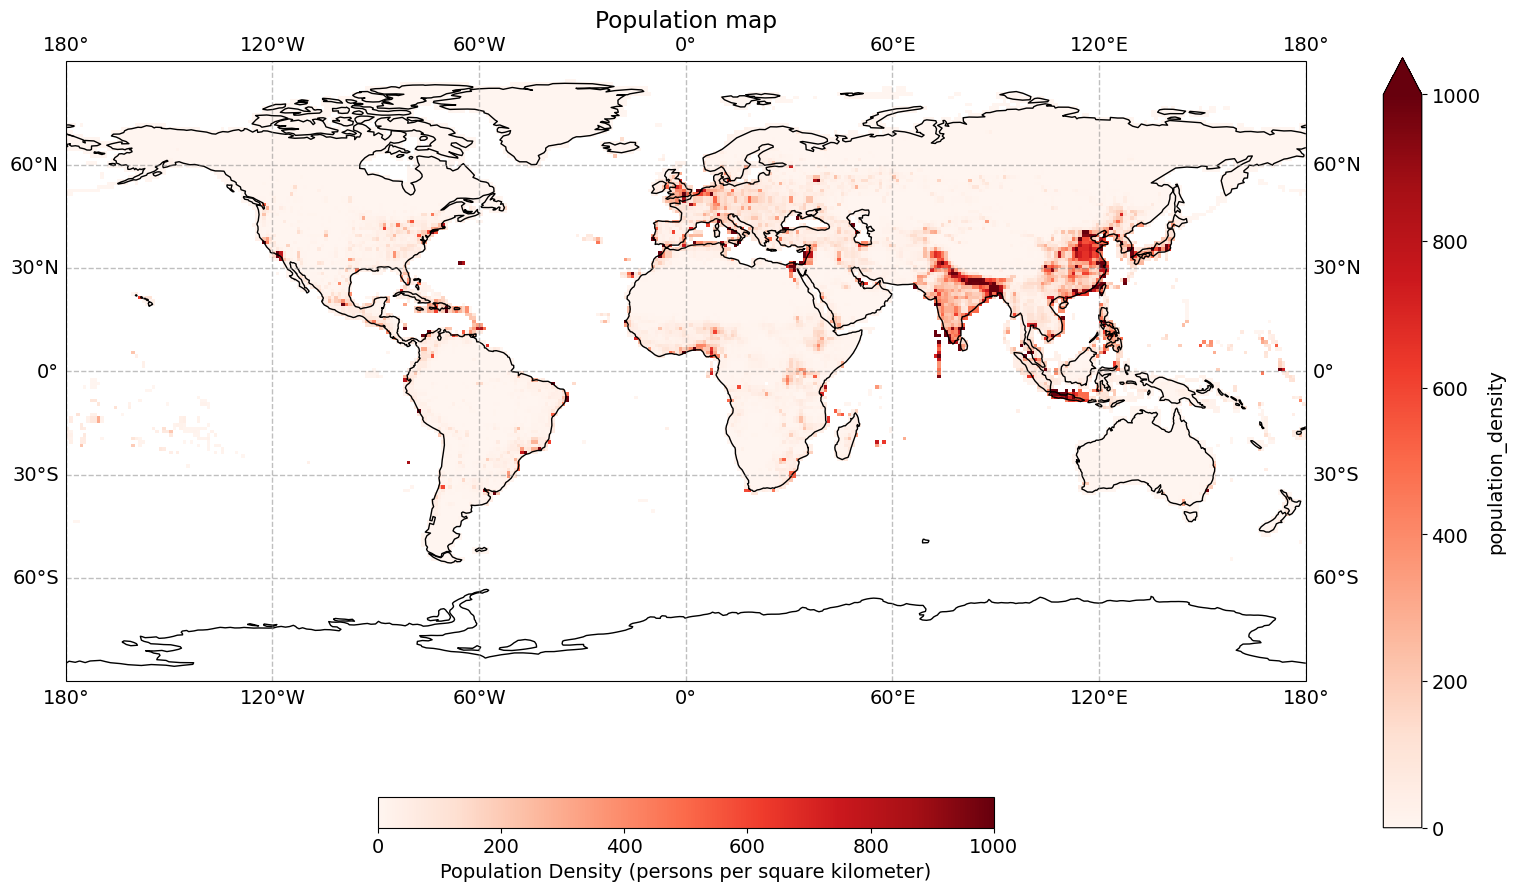

In [44]:
# No need to edit! Just run this :)

fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.axes.add_feature(cf.COASTLINE, color='k')

out = population_density['population_density'].plot(cmap='Reds', ax=ax, vmin=0, vmax=1000)
#my_aquifer.boundary.plot(ax=ax, color='red')
cb = plt.colorbar(out, fraction=0.04, orientation='horizontal')
cb.set_label("Population Density (persons per square kilometer)")
ax.set_aspect(1)
ax.set_title("Population map")

gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=1,
    color='gray',
    alpha=0.5,
    linestyle='--'
)

These maps raise a central question about the extent to which depleting terrestrial/groundwater is a climate change issue and the extent to which it is a human-created problem.

These maps support the latter point: we can see that areas near the Indus Basin have some of the highest population densities, and providing enough drinking water for these populations often means overextraction of groundwater. What's more, we can see from the first map, that the Indus Basin is also very agriculturally productive, which irrigation itself requires a lot of water.

However, it is also true that groundwater and total water storage depletion is a product of climate change. We learned from last week (where I also looked at India) that the country is experiencing a lot less precipitation and rising temperatures, which means more evapotranspiration and generally more flux out of water from the terrestrial water cycle.

So, while it is definetely true that unsustainable human land use practices can exacerbate the underlying trend of groundwater depletion (meaning our behaviors need to change), it is also important to acknowledge how climate change can be prompting these behaviors as a form of adaptation as well. For instance, less precipitation and more evapotranspiration can dry up surface/canopy water and melt snow caps that store freshwater, which means that communities must be more reliant on groundwater extraction for drinking water and irrigation.

These systems are all interlinked, but the struggle/tension remains of how to support vulnerable communities in accessing fresh water while also ensuring the resilience and health of traditional water systems.